**The Geography of Human Flourishing**

Team of the __[Spatial AI-Challenge 2024](https://i-guide.io/spatial-ai-challenge-2024/)__ Spatial AI-Challenge 2024: Stefano Iacus, Devika Jain, Andrea Nasuto. 
Other co-authors related to this project: Giuseppe Porro, Marcello Carammia, Andrea Vezzulli.

**Objectives**

This notebook provides a comprehensive guide to generating, processing and visualizing the The Geography of Human Flourishing dataset at various geospatial and temporal scale.  In this notebook, we will cover the full workflow, from data preparation, fine tuning, classification, constructions of indicators to visualization of the results. This notebook is designed to guide you through each step of the process, from data handling and preprocessing to building and evaluating a the Human Flourishing indicatiors. By the end, you’ll have a structured dataset and visualzation that you can expand upon for more complex geospatial analyses. 

***Introduction***: The notebook begings with providing an introduction to the Human Flourishing Project and our approach to Geography of Human Flourishing.

***Data Description***: An overview of the raw Twitter dataset used for classifications and the resultant Flourishing Dataset stored on Hugging Face. 

***Data Processing***: The notebooks contains instructions for: 
- finetuning of LLMs
- classification of raw tweets
- construction of statistical indicators and for each step we provide the scripts in python and R used to perform each of them.

***Deliverables***: The notebook describes in detail the project deliverables.

***Example Usage***: A demonstration of how to map the Florishing data indicators. 

***Publication***: A link to realted literature to help users better understand the concept of the work.

***Acknowledgements*** 

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Data Processing](#Data-Processing)
4. [Deliverables](#Deliverables)
5. [Example Usage](#Example-Usage)
6. [Publications](#Publications)
7. [Acknowledgements](#Acknowledgements)




Introduction 

**What is Human Florushing?**

__[The Human Flourishing Program](https://hfh.fas.harvard.edu/)__ is a research initiative whose goal is to study and promote human flourishing across a broad spectrum of life domains, integrating interdisciplinary research in social sciences, philosophy, psychology, and other fields. 
__[The Global Flourishing Study (GFS)](https://hfh.fas.harvard.edu/global-flourishing-study)__, a five-year traditional longitudinal data collection on approximately 200,000 participants from 20+ geographically and culturally diverse countries and territories, measures global human flourishing in six areas: Happiness and life satisfaction; Mental and physical health; Meaning and purpose; Character and virtue; Close social relationships and Material and financial stability.

**Our Approach**

The Geography of Human Flourishing research plan is to analyze Harvard’s collection of 10 billion geolocated tweets from 2010 to mid-2023 in view of the six areas identified by the GFS. 
The project applies __[fine-tuned large language models (LLMs)](https://arxiv.org/abs/2411.00890)__ to extract 46 human flourishing dimensions across the six areas, generate high-resolution spatio-temporal indicators. 
The project will apply large language models, to extract 46 human flourishing dimensions across the six areas of human flourishing, generate high-resolution spatio-temporal indicators and produce interactive tools to visualize and analyze the result. 
For the Spatial AI-Challenge 2024, the project analyzes a subset of 2.2 billion tweets geolocalized in the USA and generates interactive visualization tools. Given the scalability challenge, this project analyzes in parallel also the so-called migration mood and the perception of corruption. 
Well-being, migration mood and corruption are topics that are tradionally studied in couples (migration mood vs happiness; migration and corruption; corruption and well-being). This research project will study the interplay of these three large areas of research.

**Dataset Description**

The Harvard Center for Geographic Analysis (CGA) maintains the Geotweet Archive, a global record of tweets spanning time, geography, and language. The Archive extends from 2010 to July 12, 2023 when Twitter stopped allowing free access to its API, transitioning API access to a paid model. The number of tweets in the collection totals approximately 10 billion multilingual global tweets (see map below), and it is stored on Harvard University’s High Performance Computing (HPC) cluster. For more information about the archive and how to acces it please click see our Dataverse page __[Geotweets Archive v2.0](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/3NCMB6)__.

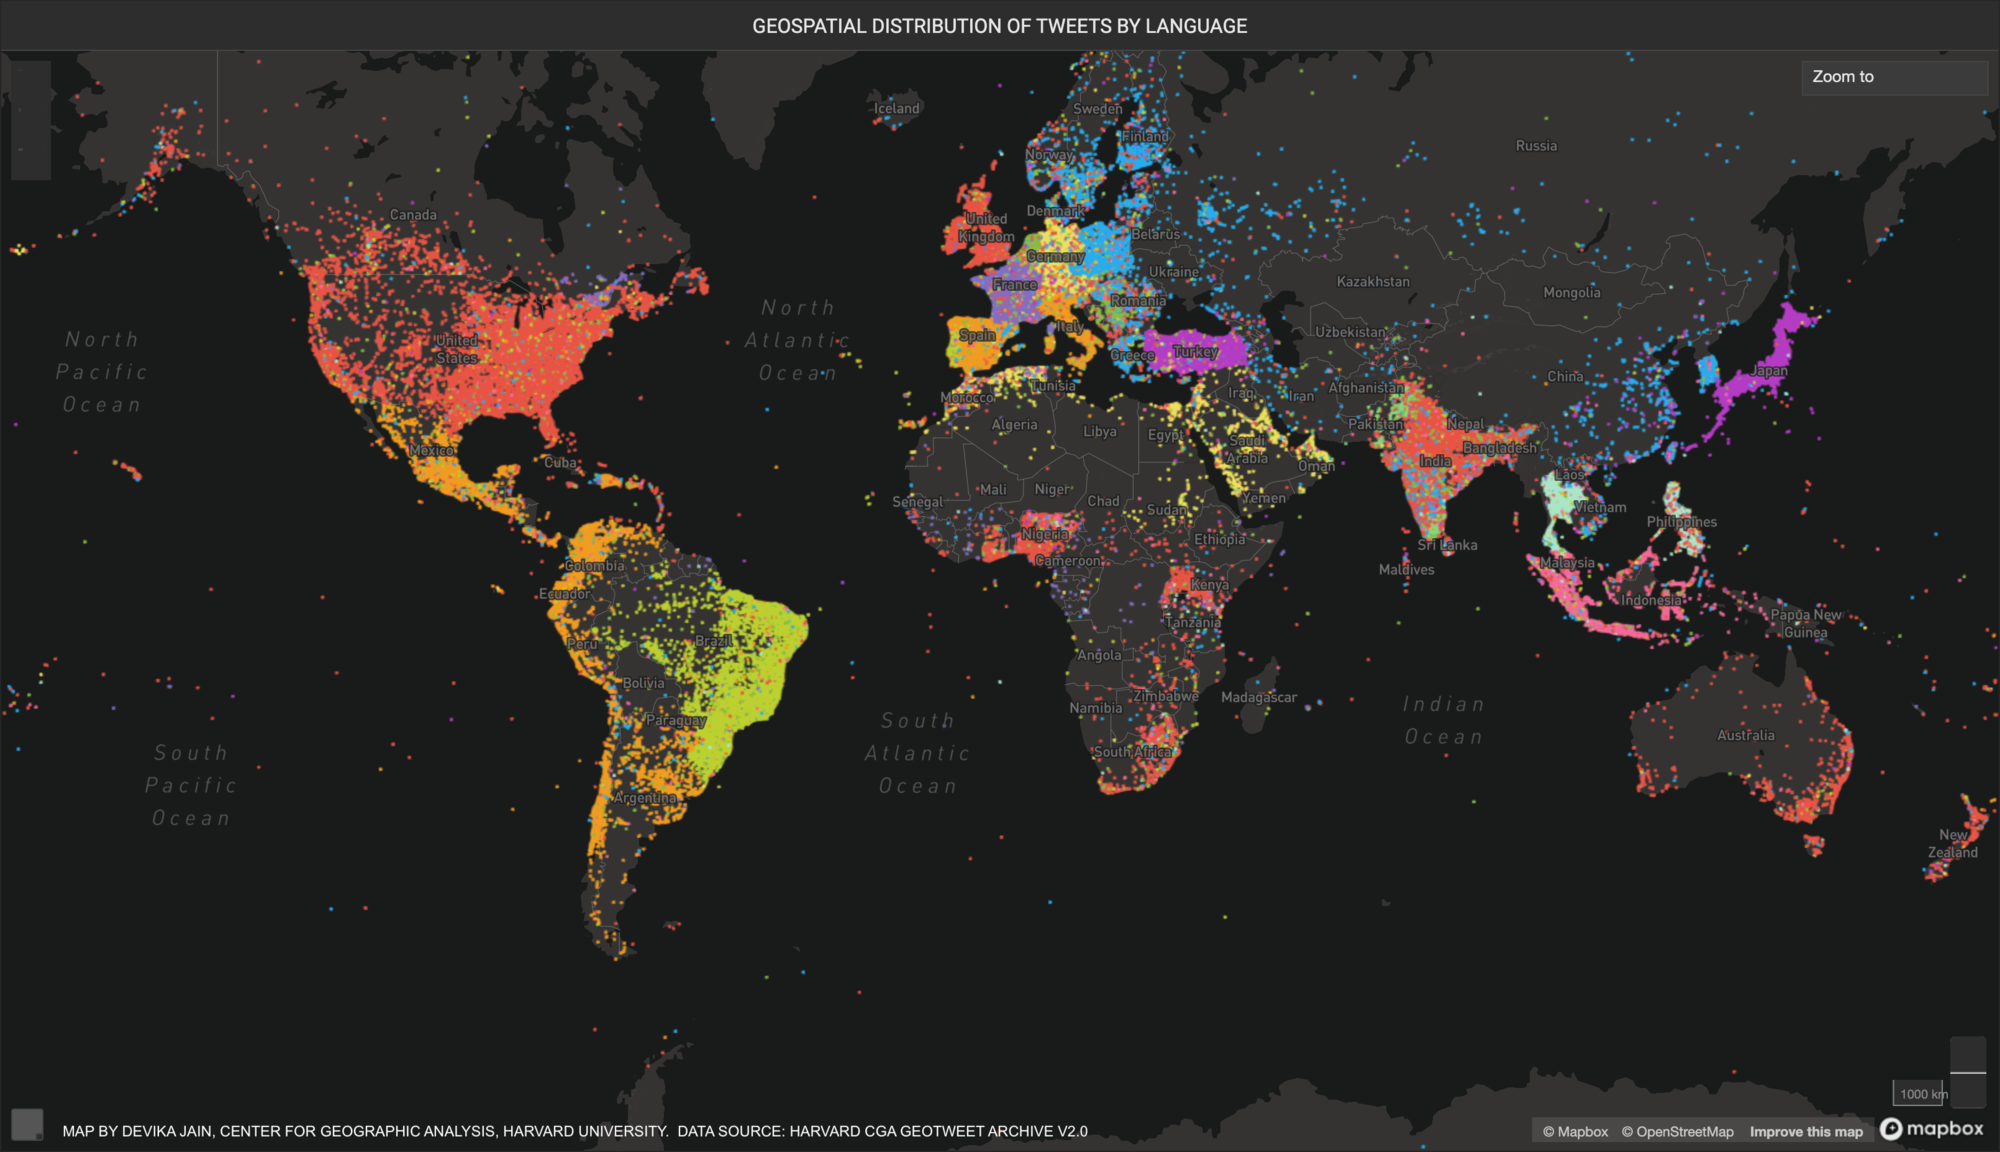


Install libraries as needed

In [ ]:
%pip install geopandas matplotlib datasets

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


-----------------------------
Load data from Hugging Face

-----------------------------

In [ ]:
state_ds = load_dataset("siacus/flourishing", data_files="flourishingStateYear.parquet")
county_ds = load_dataset("siacus/flourishing", data_files="flourishingCountyYear.parquet")

state_df = state_ds["train"].to_pandas()
county_df = county_ds["train"].to_pandas()


-----------------------------
Filter for happiness and specific year

-----------------------------

In [ ]:
var = "migmood"
yr = 2020

state_plot = state_df[(state_df["variable"] == var) & (state_df["year"] == yr)].copy()
county_plot = county_df[(county_df["variable"] == var) & (county_df["year"] == yr)].copy()

state_plot["FIPS"] = state_plot["FIPS"].apply(lambda x: f"{int(x):02d}")
county_plot["StateCounty"] = county_plot["StateCounty"].apply(lambda x: f"{int(x):05d}")


-----------------------------
Load shapefiles

-----------------------------
US State and County boundaries

Remove AK, HI, PR

In [ ]:
# states = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip")
# counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip")
states = gpd.read_file("https://huggingface.co/datasets/siacus/flourishing/resolve/main/cb_2021_us_state_20m.zip")
counties = gpd.read_file("https://huggingface.co/datasets/siacus/flourishing/resolve/main/cb_2021_us_county_20m.zip")

states = states[~states["STUSPS"].isin(["AK", "HI", "PR"])]
counties = counties[~counties["STATEFP"].isin(["02", "15", "72"])]


-----------------------------
Merge with flourishing data

-----------------------------

In [ ]:
states["FIPS"] = states["STATEFP"]
state_map = states.merge(state_plot, on="FIPS", how="left")

counties["StateCounty"] = counties["STATEFP"] + counties["COUNTYFP"]
county_map = counties.merge(county_plot, on="StateCounty", how="left")


-----------------------------
Plot maps side by side

-----------------------------

State-level map

County-level map

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

state_map.plot(
    column="stat",
    cmap="plasma",
    linewidth=0.1,
    ax=axes[0],
    edgecolor="white",
    missing_kwds={"color": "lightgrey"}
)
axes[0].set_title(f"Variable '{var}' by State - {yr}")
axes[0].axis("off")

county_map.plot(
    column="stat",
    cmap="plasma",
    linewidth=0,
    ax=axes[1],
    edgecolor="white",
    missing_kwds={"color": "lightgrey"}
)
axes[1].set_title(f"Variable '{var}' by County - {yr}")
axes[1].axis("off")

plt.tight_layout()
plt.show()